# Spotify Top Song Analysis 2018
Zachary Haroian<br>
Jakob Paulson-Palmer<br>
Elijah Crockett

## Source:
https://www.kaggle.com/nadintamer/top-spotify-tracks-of-2018

## Description:
At the end of each year, Spotify compiles a playlist of the songs streamed most often over the course of that year. This year's playlist (Top Tracks of 2018) includes 100 songs. The audio features for each song were extracted using the Spotify Web API and the spotipy Python library. Credit goes to Spotify for calculating the audio feature values.

## File Description
Number of Files: 1<br>
Name: top2018.csv<br>
Format: CSV<br>
Number of Records: 100<br>
Number of Columns: 16<br>

### Columns:

#### id
Spotify URI of the song

#### name
Name of the song

#### artists
Artist(s) of the song
 
#### danceability
Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable.

#### energy
Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale. Perceptual features contributing to this attribute include dynamic range, perceived loudness, timbre, onset rate, and general entropy.

#### key
The key the track is in. Integers map to pitches using standard Pitch Class notation. E.g. 0 = C, 1 = C♯/D♭, 2 = D, and so on.

#### loudness
The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks. Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude). Values typical range between -60 and 0 db.

#### mode
Mode indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived. Major is represented by 1 and minor is 0.

#### speechiness
Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks.

#### acousticness
A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic.

#### instrumentalness
Predicts whether a track contains no vocals. "Ooh" and "aah" sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly "vocal". The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0.

#### liveness
Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live.

#### valence
A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).

#### tempo
The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration.

#### duration_ms
The duration of the track in milliseconds.

#### time_signature
An estimated overall time signature of a track. The time signature (meter) is a notational convention to specify how many beats are in each bar (or measure).

In [197]:
# Imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Process data
preproc_data = pd.read_csv('top2018.csv')

# Rename mode to major and change to True/False
preproc_data['major'] = preproc_data['mode'] == 1.0
del preproc_data['mode']

# Name keys
preproc_data['key'] = preproc_data['key'].astype('category')
preproc_data['key'] = preproc_data['key'].cat.rename_categories({0:"C", 1:"C#", 2:"D", 3:"E♭", 4:"E", 
                                   5:"F", 6:"F#", 7:"G", 8:"A♭", 9:"A",
                                   10:"B♭", 11:"B"})

# Convert ms
preproc_data['duration_sec'] = preproc_data['duration_ms']/1000
preproc_data['duration_min'] = preproc_data['duration_sec']/60
del preproc_data['duration_ms']

# Rank
preproc_data['rank'] = preproc_data.index + 1
data = preproc_data

# Rank quarter
preproc_data['rank_quart'] = preproc_data.index//25

# Drop unnecessary columns
del data['liveness']
del data['time_signature']
del data['id']
del data['instrumentalness']
data

,name,artists,danceability,energy,key,loudness,speechiness,acousticness,valence,tempo,major,duration_sec,duration_min,rank,rank_quart
0,God's Plan,Drake,0.754,0.449,G,-9.211,0.1090,0.0332,0.3570,77.169,True,198.973,3.316217,1,0
1,SAD!,XXXTENTACION,0.740,0.613,A♭,-4.880,0.1450,0.2580,0.4730,75.023,True,166.606,2.776767,2,0
2,rockstar (feat. 21 Savage),Post Malone,0.587,0.535,F,-6.090,0.0898,0.1170,0.1400,159.847,False,218.147,3.635783,3,0
3,Psycho (feat. Ty Dolla $ign),Post Malone,0.739,0.559,A♭,-8.011,0.1170,0.5800,0.4390,140.124,True,221.440,3.690667,4,0
4,In My Feelings,Drake,0.835,0.626,C#,-5.833,0.1250,0.0589,0.3500,91.030,True,217.925,3.632083,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Rewrite The Stars,Zac Efron,0.684,0.619,B♭,-7.005,0.0386,0.0716,0.2840,125.046,True,217.440,3.624000,96,3
96,I Miss You (feat. Julia Michaels),Clean Bandit,0.638,0.658,E♭,-6.318,0.0456,0.2450,0.3300,105.076,True,205.748,3.429133,97,3
97,No Brainer,DJ Khaled,0.552,0.760,C,-4.706,0.3420,0.0733,0.6390,135.702,True,260.000,4.333333,98,3
98,Dusk Till Dawn - Radio Edit,ZAYN,0.258,0.437,B,-6.593,0.0390,0.1010,0.0967,180.043,False,239.000,3.983333,99,3


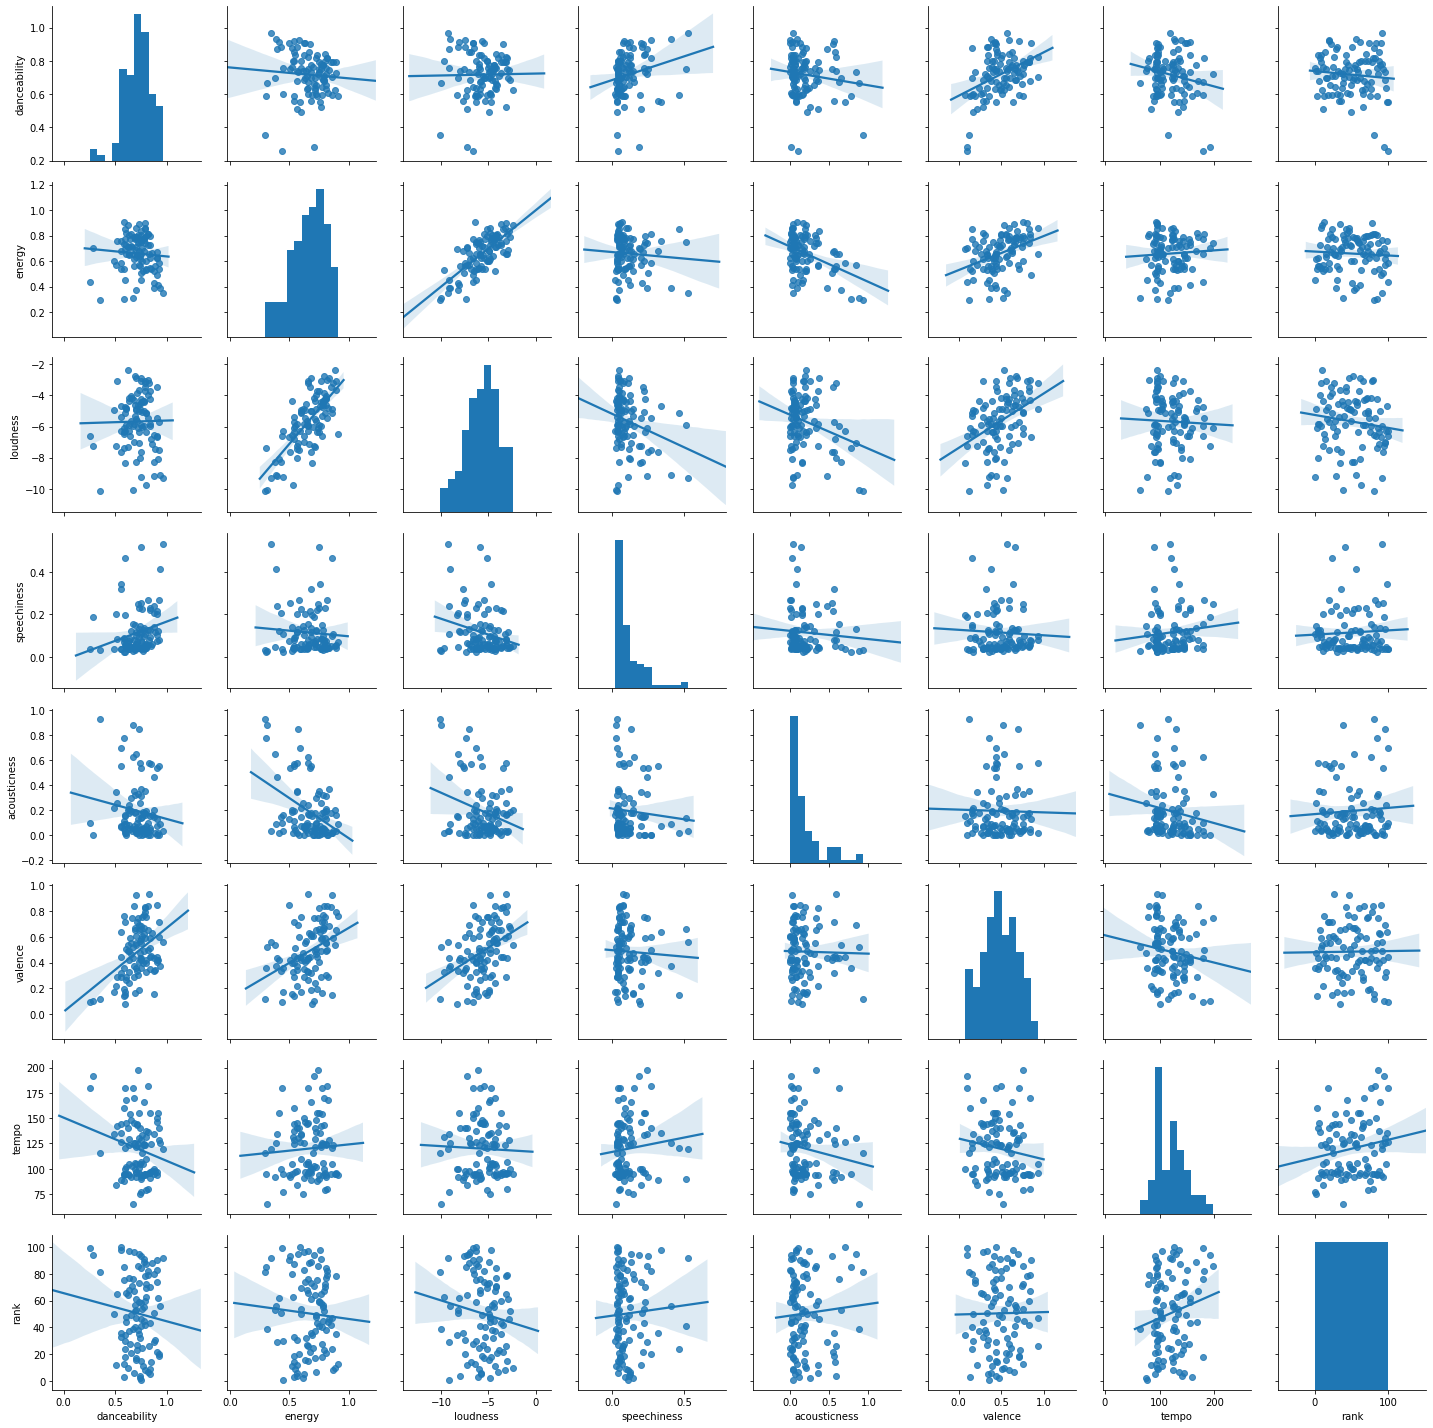

In [192]:
sns.pairplot(data, kind = 'reg', vars = ['danceability', 'energy', 'loudness', 'speechiness', 
                           'acousticness', 'valence', 'tempo', 'rank'])

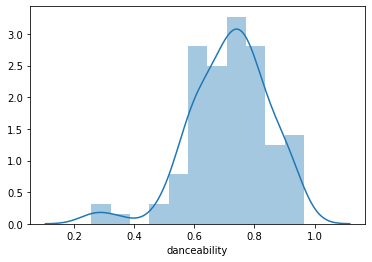

In [163]:
sns.distplot(data['danceability'])

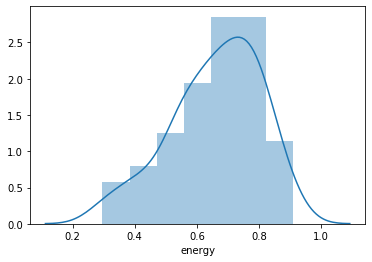

In [164]:
sns.distplot(data['energy'])

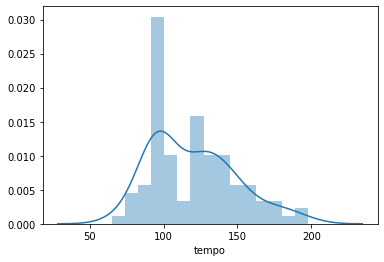

In [173]:
sns.distplot(data['tempo'], bins = 15)

In [166]:
data['artists'].value_counts().nlargest(10)

Post Malone       6
XXXTENTACION      6
Drake             4
Ed Sheeran        3
Marshmello        3
Khalid            2
Calvin Harris     2
Clean Bandit      2
Kendrick Lamar    2
Ozuna             2
Name: artists, dtype: int64

In [167]:
major = data[data['major_key'] == True]
minor = data[data['major_key'] == False]
print("Most popular major keys:\n" + str(major['key'].value_counts().nlargest(10)))
print("Most popular minor keys:\n" + str(minor['key'].value_counts().nlargest(10)))

Most popular major keys:
A♭    9
C#    9
C     7
D     6
F#    5
B     4
B♭    4
G     4
F     3
E     3
Name: key, dtype: int64
Most popular minor keys:
A     8
F     7
B     6
C#    6
C     3
A♭    2
G     2
F#    2
E     2
B♭    1
Name: key, dtype: int64


In [172]:
data[:10]

,name,artists,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,major_key
0,God's Plan,Drake,0.754,0.449,G,-9.211,0.1090,0.0332,0.000083,0.5520,0.357,77.169,198973.0,4.0,True
1,SAD!,XXXTENTACION,0.740,0.613,A♭,-4.880,0.1450,0.2580,0.003720,0.1230,0.473,75.023,166606.0,4.0,True
2,rockstar (feat. 21 Savage),Post Malone,0.587,0.535,F,-6.090,0.0898,0.1170,0.000066,0.1310,0.140,159.847,218147.0,4.0,False
3,Psycho (feat. Ty Dolla $ign),Post Malone,0.739,0.559,A♭,-8.011,0.1170,0.5800,0.000000,0.1120,0.439,140.124,221440.0,4.0,True
4,In My Feelings,Drake,0.835,0.626,C#,-5.833,0.1250,0.0589,0.000060,0.3960,0.350,91.030,217925.0,4.0,True
5,Better Now,Post Malone,0.680,0.563,B♭,-5.843,0.0454,0.3540,0.000000,0.1360,0.374,145.028,231267.0,4.0,True
6,I Like It,Cardi B,0.816,0.726,F,-3.998,0.1290,0.0990,0.000000,0.3720,0.650,136.048,253390.0,4.0,False
7,One Kiss (with Dua Lipa),Calvin Harris,0.791,0.862,A,-3.240,0.1100,0.0370,0.000022,0.0814,0.592,123.994,214847.0,4.0,False
8,IDGAF,Dua Lipa,0.836,0.544,G,-5.975,0.0943,0.0403,0.000000,0.0824,0.510,97.028,217947.0,4.0,True
9,FRIENDS,Marshmello,0.626,0.880,A,-2.384,0.0504,0.2050,0.000000,0.1280,0.534,95.079,202621.0,4.0,False


In [169]:
data.sort_values(by='danceability', ascending = False)[:10]

,name,artists,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,major_key
91,Yes Indeed,Lil Baby,0.964,0.346,F,-9.309,0.5300,0.035000,0.000000,0.1080,0.562,119.958,142273.0,4.0,False
55,FEFE (feat. Nicki Minaj & Murda Beatz),6ix9ine,0.931,0.387,C#,-9.127,0.4120,0.088000,0.000000,0.1360,0.376,125.978,179405.0,4.0,True
19,Look Alive (feat. Drake),BlocBoy JB,0.922,0.581,B♭,-7.495,0.2700,0.001040,0.000059,0.1050,0.595,140.022,181263.0,4.0,True
18,Moonlight,XXXTENTACION,0.921,0.537,A,-5.723,0.0804,0.556000,0.004040,0.1020,0.711,128.009,135090.0,4.0,False
61,Nonstop,Drake,0.912,0.412,G,-8.074,0.1240,0.016400,0.013000,0.1040,0.422,154.983,238614.0,4.0,True
89,Bella,Wolfine,0.909,0.493,E♭,-6.688,0.0735,0.128000,0.000147,0.1270,0.844,94.016,197120.0,4.0,True
73,Walk It Talk It,Migos,0.909,0.628,D,-5.456,0.2010,0.073900,0.000000,0.1080,0.406,145.905,276147.0,4.0,True
82,HUMBLE.,Kendrick Lamar,0.908,0.621,C#,-6.638,0.1020,0.000282,0.000054,0.0958,0.421,150.011,177000.0,4.0,False
21,Te Bot? - Remix,Nio Garcia,0.903,0.675,B,-3.445,0.2140,0.542000,0.000013,0.0595,0.442,96.507,417920.0,4.0,False
30,Taste (feat. Offset),Tyga,0.884,0.559,C,-7.442,0.1200,0.023600,0.000000,0.1010,0.342,97.994,232959.0,4.0,True


In [170]:
data.sort_values(by='energy', ascending = False)[:10]

,name,artists,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,major_key
12,Nice For What,Drake,0.586,0.909,A♭,-6.474,0.0705,0.08910,0.000109,0.1190,0.757,93.394,210747.0,4.0,True
77,"1, 2, 3 (feat. Jason Derulo & De La Ghetto)",Sofia Reyes,0.792,0.895,C#,-3.112,0.0589,0.16500,0.000000,0.0501,0.794,94.968,201526.0,4.0,False
34,?chame La Culpa,Luis Fonsi,0.726,0.889,C,-3.655,0.0429,0.03280,0.000000,0.0925,0.649,96.024,173720.0,4.0,True
9,FRIENDS,Marshmello,0.626,0.880,A,-2.384,0.0504,0.20500,0.000000,0.1280,0.534,95.079,202621.0,4.0,False
7,One Kiss (with Dua Lipa),Calvin Harris,0.791,0.862,A,-3.240,0.1100,0.03700,0.000022,0.0814,0.592,123.994,214847.0,4.0,False
46,Finesse (Remix) [feat. Cardi B],Bruno Mars,0.704,0.859,F,-4.877,0.0996,0.01850,0.000000,0.0215,0.926,105.115,217289.0,4.0,False
23,Youngblood,5 Seconds of Summer,0.596,0.854,G,-5.114,0.4630,0.01690,0.000000,0.1240,0.152,120.274,203418.0,4.0,False
41,Dura,Daddy Yankee,0.791,0.848,C#,-3.456,0.0506,0.18300,0.000000,0.4090,0.828,95.000,200480.0,4.0,True
45,Jackie Chan,Ti?sto,0.747,0.834,E♭,-2.867,0.0450,0.37400,0.000000,0.0586,0.687,128.005,215760.0,4.0,False
43,Thunder,Imagine Dragons,0.605,0.822,C,-4.833,0.0438,0.00671,0.134000,0.1470,0.288,167.997,187147.0,4.0,True


In [171]:
data.sort_values(by='loudness', ascending = False)[:10]

,name,artists,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,major_key
9,FRIENDS,Marshmello,0.626,0.880,A,-2.384,0.0504,0.2050,0.000000,0.1280,0.534,95.079,202621.0,4.0,False
51,Happier,Marshmello,0.687,0.792,F,-2.749,0.0452,0.1910,0.000000,0.1670,0.671,100.015,214290.0,4.0,True
45,Jackie Chan,Ti?sto,0.747,0.834,E♭,-2.867,0.0450,0.3740,0.000000,0.0586,0.687,128.005,215760.0,4.0,False
60,2002,Anne-Marie,0.697,0.683,C#,-2.881,0.1170,0.0372,0.000000,0.1370,0.603,96.133,186987.0,4.0,False
78,Criminal,Natti Natasha,0.814,0.813,D,-3.023,0.0561,0.0300,0.000093,0.2550,0.839,79.997,232550.0,4.0,False
14,The Middle,Zedd,0.753,0.657,G,-3.061,0.0449,0.1710,0.000000,0.1120,0.437,107.010,184732.0,4.0,True
64,Silence,Marshmello,0.520,0.761,E,-3.093,0.0853,0.2560,0.000005,0.1700,0.286,141.971,180823.0,4.0,True
77,"1, 2, 3 (feat. Jason Derulo & De La Ghetto)",Sofia Reyes,0.792,0.895,C#,-3.112,0.0589,0.1650,0.000000,0.0501,0.794,94.968,201526.0,4.0,False
25,Shape of You,Ed Sheeran,0.825,0.652,C#,-3.183,0.0802,0.5810,0.000000,0.0931,0.931,95.977,233713.0,4.0,False
7,One Kiss (with Dua Lipa),Calvin Harris,0.791,0.862,A,-3.240,0.1100,0.0370,0.000022,0.0814,0.592,123.994,214847.0,4.0,False


In [180]:
sns.scatterplot(data, x = "name", y = "loudness")

TypeError: scatterplot() got multiple values for argument 'x'